<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/JPX_Competition_Metric_Definition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)

In [9]:
stock_list = pd.read_csv('/content/stock_list.csv')
stock_list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


# **1. Understand how to calculate scores and deepen your understanding of Rank**.
https://www.kaggle.com/code/smeitoma/jpx-competition-metric-definition

Here is how to calculate the score. It is difficult to understand in mathematics formulas, so I will try to understand them one by one.



In [12]:
!unzip "/content/stock_prices.csv.zip"

Archive:  /content/stock_prices.csv.zip
  inflating: stock_prices.csv        


In [14]:
stock_prices = pd.read_csv("stock_prices.csv")
stock_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867


In [15]:
stock_prices['Date'] = pd.to_datetime(stock_prices["Date"])

## **1.1 Let's look at only stock**

In [16]:
tmpdf = stock_prices[stock_prices["SecuritiesCode"] == 1301].reset_index(drop = True)
tmpdf

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211207_1301,2021-12-07,1301,2998.0,3065.0,2990.0,3065.0,19100,1.0,NaN,False,0.009820
2,20211208_1301,2021-12-08,1301,3080.0,3080.0,3035.0,3055.0,11600,1.0,NaN,False,0.006483
3,20211209_1301,2021-12-09,1301,3050.0,3085.0,3025.0,3085.0,11700,1.0,NaN,False,-0.006441
4,20211210_1301,2021-12-10,1301,3100.0,3105.0,3050.0,3105.0,14700,1.0,NaN,False,-0.008104
...,...,...,...,...,...,...,...,...,...,...,...,...
130,20220620_1301,2022-06-20,1301,3400.0,3410.0,3320.0,3325.0,13400,1.0,NaN,False,0.020802
131,20220621_1301,2022-06-21,1301,3325.0,3385.0,3315.0,3365.0,14100,1.0,NaN,False,0.004367
132,20220622_1301,2022-06-22,1301,3365.0,3435.0,3365.0,3435.0,17200,1.0,NaN,False,-0.015942
133,20220623_1301,2022-06-23,1301,3460.0,3470.0,3440.0,3450.0,15500,1.0,NaN,False,0.004418


## **Step 1: Try to calculate TARGET (Change rate of Close on the next day and the next day) by yourself.**
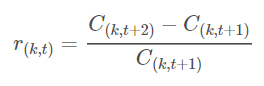

I think open is the price at the beginning of the day, close is the stock when it closes. So close is the stock price at the end of the day.

In [18]:
tmpdf["Close_shift1"] = tmpdf["Close"].shift(-1)
tmpdf["Close_shift2"] = tmpdf["Close"].shift(-2)

tmpdf["rate"] = (tmpdf["Close_shift2"] - tmpdf["Close_shift1"])/tmpdf["Close_shift1"]
tmpdf

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Close_shift1,Close_shift2,rate
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263,3065.0,3055.0,-0.003263
1,20211207_1301,2021-12-07,1301,2998.0,3065.0,2990.0,3065.0,19100,1.0,NaN,False,0.009820,3055.0,3085.0,0.009820
2,20211208_1301,2021-12-08,1301,3080.0,3080.0,3035.0,3055.0,11600,1.0,NaN,False,0.006483,3085.0,3105.0,0.006483
3,20211209_1301,2021-12-09,1301,3050.0,3085.0,3025.0,3085.0,11700,1.0,NaN,False,-0.006441,3105.0,3085.0,-0.006441
4,20211210_1301,2021-12-10,1301,3100.0,3105.0,3050.0,3105.0,14700,1.0,NaN,False,-0.008104,3085.0,3060.0,-0.008104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,20220620_1301,2022-06-20,1301,3400.0,3410.0,3320.0,3325.0,13400,1.0,NaN,False,0.020802,3365.0,3435.0,0.020802
131,20220621_1301,2022-06-21,1301,3325.0,3385.0,3315.0,3365.0,14100,1.0,NaN,False,0.004367,3435.0,3450.0,0.004367
132,20220622_1301,2022-06-22,1301,3365.0,3435.0,3365.0,3435.0,17200,1.0,NaN,False,-0.015942,3450.0,3395.0,-0.015942
133,20220623_1301,2022-06-23,1301,3460.0,3470.0,3440.0,3450.0,15500,1.0,NaN,False,0.004418,3395.0,NaN,NaN


This understanding is OK because the Target and the rate calculated by myself match. (i will use the target that is calculated from now on).

## **Rank calculation**
First, let's take a look at only one day. *Please note that not all 2000 stocks have data depending on Date

In [19]:
stock_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963


In [28]:
tmpdf2 = stock_prices[stock_prices["Date"] == "2021-12-06"].reset_index(drop = True)
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211206_9990,2021-12-06,9990,528.0,531.0,516.0,517.0,65300,1.0,NaN,False,0.009346
1996,20211206_9991,2021-12-06,9991,796.0,800.0,785.0,785.0,29100,1.0,NaN,False,0.001242
1997,20211206_9993,2021-12-06,9993,1645.0,1653.0,1627.0,1627.0,6200,1.0,NaN,False,0.011728
1998,20211206_9994,2021-12-06,9994,2394.0,2433.0,2393.0,2418.0,7800,1.0,NaN,False,-0.001230


Rank in descending order of Target. I do sort it for understanding. Rank is tied to 0 -1999, so dont forget to minus 1

In [30]:
# Using rank function to define the rank
tmpdf2["Rank"] = tmpdf2["Target"].rank(ascending = False, method = "first") -1
tmpdf2 = tmpdf2.sort_values("Rank").reset_index(drop = True)

In term of meaning, the smaller the rank, the larger the rate of change to +, so it is profitable to buy it. The larger the rank value, the greater the rate of change so it is profitable to sell it.

## **Step 3: Calculation of daily spread return of this day**

https://www.kaggle.com/code/smeitoma/jpx-competition-metric-definition

If you look at, for the top 200 and bottom 200 of the rank, multiply the rate of change target of the closing price you just understood by weight (1 ~ 2). I'm not good at formulas, so I'll calculate it.
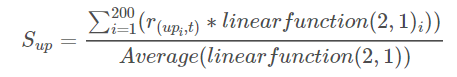

Consider only a rank of 200 from the top( 200 larger Targets).

In [31]:
tmpdf2_top200 = tmpdf2.iloc[:200,:]
tmpdf2_top200

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20211206_4699,2021-12-06,4699,2660.0,2660.0,2660.0,2660.0,2900,1.0,NaN,True,0.300633,0.0
1,20211206_7036,2021-12-06,7036,3800.0,3860.0,3730.0,3765.0,1500,1.0,NaN,False,0.178344,1.0
2,20211206_9919,2021-12-06,9919,1825.0,1825.0,1780.0,1784.0,69300,1.0,NaN,False,0.094653,2.0
3,20211206_2150,2021-12-06,2150,1089.0,1092.0,1027.0,1065.0,783200,1.0,NaN,False,0.090510,3.0
4,20211206_4323,2021-12-06,4323,2825.0,2825.0,2698.0,2733.0,55800,1.0,NaN,False,0.087034,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211206_4661,2021-12-06,4661,18025.0,18160.0,17630.0,17670.0,646600,1.0,NaN,False,0.026930,195.0
196,20211206_7718,2021-12-06,7718,1515.0,1560.0,1514.0,1514.0,327100,1.0,NaN,False,0.026923,196.0
197,20211206_6055,2021-12-06,6055,1630.0,1658.0,1620.0,1655.0,407300,1.0,NaN,False,0.026713,197.0
198,20211206_5982,2021-12-06,5982,2098.0,2110.0,2090.0,2099.0,4700,1.0,NaN,False,0.026519,198.0


Calculate the top 200 weights and embeded them in finweights

In [33]:
weights = np.linspace(start = 2, stop = 1, num = 200)
tmpdf2_top200["weights"] = weights
tmpdf2_top200.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank,weights
0,20211206_4699,2021-12-06,4699,2660.0,2660.0,2660.0,2660.0,2900,1.0,NaN,True,0.300633,0.0,2.000000
1,20211206_7036,2021-12-06,7036,3800.0,3860.0,3730.0,3765.0,1500,1.0,NaN,False,0.178344,1.0,1.994975
2,20211206_9919,2021-12-06,9919,1825.0,1825.0,1780.0,1784.0,69300,1.0,NaN,False,0.094653,2.0,1.989950


Multiply this target

In [40]:
tmpdf2_top200["Calc_weights"] = tmpdf2_top200["Target"]*tmpdf2_top200["weights"]
tmpdf2_top200.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank,weights,Calc_weights
0,20211206_4699,2021-12-06,4699,2660.0,2660.0,2660.0,2660.0,2900,1.0,NaN,True,0.300633,0.0,2.000000,0.601266
1,20211206_7036,2021-12-06,7036,3800.0,3860.0,3730.0,3765.0,1500,1.0,NaN,False,0.178344,1.0,1.994975,0.355792
2,20211206_9919,2021-12-06,9919,1825.0,1825.0,1780.0,1784.0,69300,1.0,NaN,False,0.094653,2.0,1.989950,0.188355


The sum of this is divided by weight, Sup
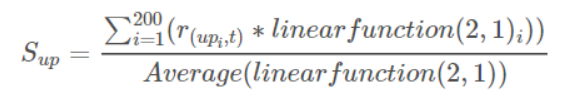

In [41]:
Sup = tmpdf2_top200["Calc_weights"].sum()/np.mean(weights)
Sup

9.351582917762713

Similarly, calculate Sdown by calculating 200 bottoms

In [44]:
tmpdf2_bottom200 = tmpdf2.iloc[-200:,:]
tmpdf2_bottom200 = tmpdf2_bottom200.sort_values("Rank", ascending = False).reset_index(drop = True)
tmpdf2_bottom200

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20211206_2987,2021-12-06,2987,3475.0,3510.0,3200.0,3285.0,104000,1.0,NaN,False,-0.073718,1999.0
1,20211206_2329,2021-12-06,2329,683.0,699.0,683.0,687.0,5600,1.0,NaN,False,-0.056034,1998.0
2,20211206_4169,2021-12-06,4169,7090.0,7130.0,5730.0,6300.0,613600,1.0,NaN,False,-0.056013,1997.0
3,20211206_1873,2021-12-06,1873,348.0,352.0,346.0,348.0,81300,1.0,NaN,False,-0.055690,1996.0
4,20211206_9090,2021-12-06,9090,1440.0,1447.0,1393.0,1410.0,107900,1.0,NaN,False,-0.039148,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211206_2004,2021-12-06,2004,2616.0,2646.0,2615.0,2626.0,59100,1.0,NaN,False,-0.013109,1804.0
196,20211206_3036,2021-12-06,3036,1164.0,1172.0,1154.0,1161.0,535300,1.0,NaN,False,-0.013104,1803.0
197,20211206_6250,2021-12-06,6250,1269.0,1283.0,1267.0,1269.0,37000,1.0,NaN,False,-0.012997,1802.0
198,20211206_3990,2021-12-06,3990,826.0,826.0,809.0,822.0,92300,1.0,NaN,False,-0.012972,1801.0


In [51]:
tmpdf2_bottom200["weights"] = weights

tmpdf2_bottom200["Calc_weights"] = tmpdf2_bottom200["Target"]*tmpdf2_bottom200["weights"]
tmpdf2_bottom200.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank,weights,Calc_weights
0,20211206_2987,2021-12-06,2987,3475.0,3510.0,3200.0,3285.0,104000,1.0,NaN,False,-0.073718,1999.0,2.000000,-0.147436
1,20211206_2329,2021-12-06,2329,683.0,699.0,683.0,687.0,5600,1.0,NaN,False,-0.056034,1998.0,1.994975,-0.111787
2,20211206_4169,2021-12-06,4169,7090.0,7130.0,5730.0,6300.0,613600,1.0,NaN,False,-0.056013,1997.0,1.989950,-0.111463


In [52]:
Sdown = tmpdf2_bottom200["Calc_weights"].sum()/np.mean(weights)
Sdown

-4.37658898955669

### **Calculate daily spread return**

In [54]:
daily_spread_return = Sup - Sdown
daily_spread_return

13.728171907319403

This is calculated every day, and the score is calculated by dividing the average value of daily_spread_return for a certain period by the standard deviation.

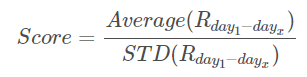


The following functions have put together that.

In [55]:
import numpy as np
import pandas as pd


def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

## **1.2 [Case verification] Score calculation**

Let's calculate the score of this competition with a function only in 2021 where 2000 stocks are available.

### **1.2.1. Filtering for explanation**

In [56]:
idcount = stock_prices.groupby("Date")["SecuritiesCode"].count().reset_index()
idcount

,Date,SecuritiesCode
0,2021-12-06,2000
1,2021-12-07,2000
2,2021-12-08,2000
3,2021-12-09,2000
4,2021-12-10,2000
...,...,...
130,2022-06-20,1996
131,2022-06-21,1996
132,2022-06-22,1996
133,2022-06-23,1996


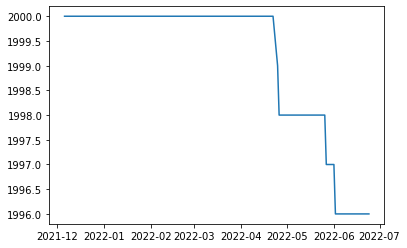

In [57]:
plt.plot(idcount["Date"], idcount["SecuritiesCode"])

In [58]:
idcount.loc[idcount["SecuritiesCode"]==2000,:]

,Date,SecuritiesCode
0,2021-12-06,2000
1,2021-12-07,2000
2,2021-12-08,2000
3,2021-12-09,2000
4,2021-12-10,2000
...,...,...
89,2022-04-18,2000
90,2022-04-19,2000
91,2022-04-20,2000
92,2022-04-21,2000


In [59]:
stock_prices2 = stock_prices.loc[stock_prices["Date"] >= "2021-01-01"].reset_index(drop = True)
stock_prices2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...
269876,20220624_9990,2022-06-24,9990,576.0,576.0,563.0,564.0,24200,1.0,NaN,False,0.027073
269877,20220624_9991,2022-06-24,9991,810.0,815.0,804.0,815.0,8700,1.0,NaN,False,0.001220
269878,20220624_9993,2022-06-24,9993,1548.0,1548.0,1497.0,1497.0,12600,1.0,NaN,False,0.001329
269879,20220624_9994,2022-06-24,9994,2507.0,2527.0,2498.0,2527.0,7300,1.0,NaN,False,0.003185


In [63]:
stock_prices2["Rank"] = stock_prices2.groupby("Date")["Target"].rank(ascending = False, 
                                                                    method = "first") - 1
stock_prices2["Rank"] = stock_prices2["Rank"].astype("int", errors = "ignore") #float    

In [74]:
stock_prices2_1 = stock_prices2.drop(stock_prices2[stock_prices2["Rank"].isnull()].index)

In [75]:
score = calc_spread_return_sharpe(stock_prices2_1, portfolio_size = 200, toprank_weight_ratio = 2)
score

4.854682801006776

And, the score in this period came out. The person with this big wins

## **2. What do you predict the Rank from? (Look at the data)**

First of all, there are many folders, so what does that mean?
* Data_specifications: Folder with files that define what the columns in each file mean
* train_files: A data folder that covers the main training period
* Supplemental_files: Probably, the lastest stock price data will be updated in early May, early June, and one week before the end of the competition.
* Example_test_files: An example of the file format provided at the time of submit. Since Target is not included, you can calculate by yourself from Close.

### **2.1 For the time being, let's look only at the contents of the main train_files (The meaning of column shows data_specifications)**

#### **2.1.1 Stock_price**

The core file of interest. Includes the daily closing price for each stock and the target column.samfalf
